https://mp.weixin.qq.com/s/nyCJ9TtpctLS3PW7t6Cmgg

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
print(torch.__version__)

In [ ]:
dataset = MNIST(root='../dataset/',download=True)

In [ ]:
test_dataset = MNIST(root='../dataset/',train=False)
len(test_dataset)

In [ ]:
dataset[0]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image,label = dataset[0]
plt.imshow(image)
print('Label:',label)

In [ ]:
# Pytorch无法直接处理图像，需要将图像转换成tensor
import torchvision.transforms as transforms

In [ ]:
dataset = MNIST(root='../dataset/',train=True,transform=transforms.ToTensor())

In [ ]:
img_tensor,label = dataset[0]
print(img_tensor.shape,label)

In [ ]:
print(img_tensor[:,10:15,10:15])

In [ ]:
plt.imshow(img_tensor[0],cmap='gray')

In [17]:
import numpy as np

In [18]:
# 训练和验证数据集
import numpy as np
def split_indices(n,val_pct):
    # 定义验证集的大小
    n_val = int(val_pct*n)
    # 创建随机0到n-1的数列
    idxs = np.random.permutation(n)
    # 挑选第一个n_val为验证集的开始
    return idxs[n_val:],idxs[:n_val]

In [19]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [20]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [18440 11347 30943 56540 34263 30533 42999  3012 45960 43659  5591 54299
 13217 47201 17430 18758 50043 37672 37188 41691]


In [21]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [22]:
batch_size=100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size, 
                          sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size, 
                        sampler=val_sampler)

In [24]:
# 模型
import torch.nn as nn

In [25]:
input_size = 28*28
num_classes = 10
# 逻辑回归模型
model = nn.Linear(input_size,num_classes)

In [26]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0259,  0.0195, -0.0271,  ...,  0.0318, -0.0343, -0.0080],
        [-0.0091,  0.0149,  0.0291,  ..., -0.0253,  0.0189, -0.0234],
        [-0.0185, -0.0136, -0.0034,  ...,  0.0228, -0.0335, -0.0210],
        ...,
        [ 0.0348,  0.0333, -0.0329,  ..., -0.0343, -0.0147,  0.0090],
        [ 0.0244, -0.0094, -0.0194,  ...,  0.0144, -0.0071,  0.0046],
        [-0.0004, -0.0088,  0.0307,  ..., -0.0025,  0.0252, -0.0095]],
       requires_grad=True)

In [27]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0106, -0.0085, -0.0010,  0.0169,  0.0084,  0.0105, -0.0253, -0.0155,
        -0.0034, -0.0231], requires_grad=True)

In [29]:
# reshape
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [30]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters()) # 返回包含权重和偏差的列表

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0295, -0.0256, -0.0008,  ..., -0.0099,  0.0066, -0.0283],
         [ 0.0247, -0.0237,  0.0022,  ..., -0.0187,  0.0031, -0.0152],
         [-0.0068, -0.0222,  0.0136,  ...,  0.0223,  0.0204,  0.0235],
         ...,
         [-0.0268,  0.0287, -0.0179,  ...,  0.0133, -0.0013, -0.0319],
         [ 0.0247,  0.0338,  0.0251,  ...,  0.0099,  0.0102,  0.0308],
         [ 0.0128,  0.0104, -0.0193,  ..., -0.0063,  0.0169, -0.0017]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0187, -0.0189,  0.0176, -0.0108,  0.0257,  0.0147, -0.0167,  0.0319,
         -0.0262, -0.0069], requires_grad=True)]

In [31]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.1846, -0.0555,  0.1163,  0.0377, -0.2811,  0.0452,  0.0603,  0.0935,
          0.1397, -0.0840],
        [-0.1666,  0.0475,  0.4868, -0.2980, -0.0412,  0.0668, -0.0506, -0.1591,
         -0.0080,  0.3366]])


In [32]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0859, -0.0300,  0.1691, -0.1258, -0.2122,  0.1627, -0.2197, -0.1946,
          0.1369,  0.2111],
        [ 0.1207,  0.2300,  0.4857, -0.0645,  0.2487, -0.0302,  0.1075,  0.1674,
          0.0404,  0.1104]])


In [33]:
import torch.nn.functional as F

In [34]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0923, 0.0976, 0.1190, 0.0886, 0.0813, 0.1183, 0.0807, 0.0828, 0.1153,
         0.1242],
        [0.0968, 0.1080, 0.1394, 0.0804, 0.1100, 0.0832, 0.0955, 0.1014, 0.0893,
         0.0958]])
Sum:  1.0


In [35]:
max_probs,preds = torch.max(probs,dim=1)
print(preds)

tensor([9, 2, 0, 9, 8, 2, 2, 2, 2, 5, 2, 5, 2, 3, 2, 9, 0, 2, 1, 5, 2, 2, 9, 3,
        0, 2, 2, 9, 0, 2, 2, 5, 2, 2, 2, 9, 3, 9, 2, 9, 9, 2, 7, 8, 2, 2, 2, 9,
        2, 2, 6, 2, 9, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 8, 6, 2, 2, 2, 5, 9,
        9, 8, 1, 2, 8, 3, 2, 0, 2, 2, 2, 3, 9, 2, 7, 2, 6, 2, 2, 2, 8, 9, 2, 9,
        2, 6, 9, 9])


In [36]:
labels

tensor([9, 2, 2, 7, 9, 4, 6, 6, 9, 4, 5, 4, 4, 8, 2, 1, 1, 1, 9, 7, 1, 1, 8, 5,
        5, 2, 8, 4, 3, 0, 1, 8, 1, 5, 2, 4, 9, 7, 3, 6, 1, 6, 5, 7, 6, 8, 1, 1,
        2, 0, 0, 8, 1, 0, 1, 2, 8, 2, 4, 5, 5, 1, 3, 1, 7, 8, 9, 6, 1, 2, 7, 4,
        5, 7, 3, 2, 5, 4, 1, 3, 4, 6, 3, 4, 8, 5, 0, 8, 7, 1, 9, 6, 4, 1, 4, 4,
        4, 0, 1, 8])

In [37]:
# 评估度量和损失函数
def accuracy(l1,l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [38]:
accuracy(preds,labels)

0.1

In [39]:
loss_fn = F.cross_entropy

In [40]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3327, grad_fn=<NllLossBackward>)


In [41]:
# 优化
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [44]:
# 训练模型
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    # 计算损失
    preds = model(xb)
    loss = loss_func(preds,yb)
    if opt is not None:
        # 计算梯度
        loss.backward()
        # 更新参数
        opt.step()
        # 重置梯度
        opt.zero_grad()
    metric_result = None
    if metric is not None:
        # 计算矩阵
        metric_result = metric(preds,yb)
    return loss.item(),len(xb),metric_result

In [45]:
#  计算验证集的总体损失
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [46]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [47]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3186, Accuracy: 0.1120


In [48]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [49]:
# Redifine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [50]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8831, accuracy: 0.6896
Epoch [2/5], Loss: 1.5811, accuracy: 0.7637
Epoch [3/5], Loss: 1.3696, accuracy: 0.7887
Epoch [4/5], Loss: 1.2181, accuracy: 0.8004
Epoch [5/5], Loss: 1.1062, accuracy: 0.8117


In [51]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0209, accuracy: 0.8203
Epoch [2/5], Loss: 0.9536, accuracy: 0.8255
Epoch [3/5], Loss: 0.8994, accuracy: 0.8294
Epoch [4/5], Loss: 0.8548, accuracy: 0.8328
Epoch [5/5], Loss: 0.8175, accuracy: 0.8352


In [52]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7856, accuracy: 0.8377
Epoch [2/5], Loss: 0.7582, accuracy: 0.8401
Epoch [3/5], Loss: 0.7343, accuracy: 0.8423
Epoch [4/5], Loss: 0.7131, accuracy: 0.8450
Epoch [5/5], Loss: 0.6944, accuracy: 0.8475


In [53]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6777, accuracy: 0.8488
Epoch [2/5], Loss: 0.6626, accuracy: 0.8507
Epoch [3/5], Loss: 0.6489, accuracy: 0.8531
Epoch [4/5], Loss: 0.6364, accuracy: 0.8541
Epoch [5/5], Loss: 0.6250, accuracy: 0.8552


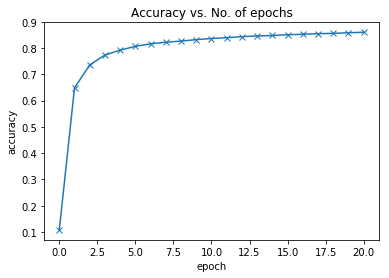

In [54]:
# Replace these values with your results
accuracies = [0.1076, 0.6486, 0.7362, 0.7737, 0.7925, 0.8069, 
              0.8165, 0.8227, 0.8269, 0.8325, 0.8367,
              0.8399, 0.8438, 0.8463, 0.8482, 0.8512,
              0.8529, 0.8552, 0.8563, 0.8587, 0.8606]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [56]:
# Define test dataset
test_dataset = MNIST(root='../dataset/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


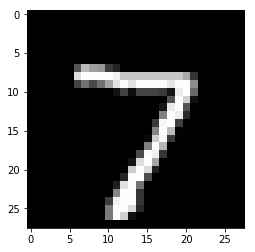

In [57]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [58]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


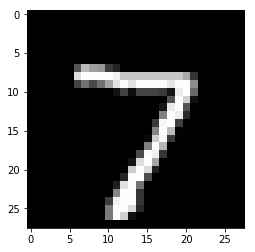

In [59]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


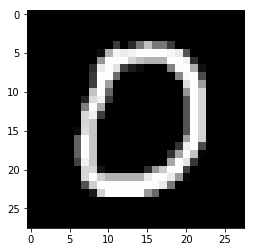

In [60]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


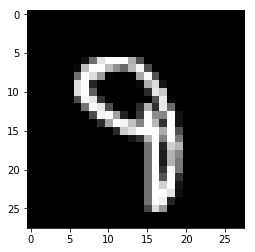

In [61]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 3 , Predicted: 5


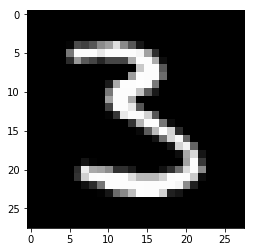

In [62]:
img, label = test_dataset[1889]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [63]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5947, Accuracy: 0.8682


In [64]:
# 保存加载模型
torch.save(model.state_dict(),'../dataset/mnist_logistic.pth')

In [65]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 2.8604e-02,  3.0332e-02,  3.2241e-02,  ...,  2.7478e-02,
                        4.4436e-03, -1.1815e-02],
                      [ 2.1928e-02,  2.1416e-02,  3.0131e-03,  ..., -2.9282e-02,
                        1.5006e-02,  2.1047e-02],
                      [-2.8020e-02,  8.7929e-03,  3.2058e-02,  ...,  4.5490e-05,
                       -4.3436e-03,  2.9610e-02],
                      ...,
                      [ 1.3719e-02, -2.9503e-02,  3.6410e-03,  ...,  1.0788e-02,
                       -5.8315e-03,  2.0756e-02],
                      [-7.5518e-03,  2.4706e-02,  8.5890e-03,  ..., -1.3711e-02,
                        4.5113e-03,  2.5724e-03],
                      [ 7.0339e-04, -2.4474e-02, -1.7951e-02,  ..., -2.4362e-02,
                        3.4991e-02, -2.3155e-02]])),
             ('linear.bias',
              tensor([-0.0268,  0.0751, -0.0590, -0.0202,  0.0337,  0.0573, -0.0072,  0.0452,
                      -0.1083,

In [66]:
model2  = MnistModel()
model2.load_state_dict(torch.load('../dataset/mnist_logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 2.8604e-02,  3.0332e-02,  3.2241e-02,  ...,  2.7478e-02,
                        4.4436e-03, -1.1815e-02],
                      [ 2.1928e-02,  2.1416e-02,  3.0131e-03,  ..., -2.9282e-02,
                        1.5006e-02,  2.1047e-02],
                      [-2.8020e-02,  8.7929e-03,  3.2058e-02,  ...,  4.5490e-05,
                       -4.3436e-03,  2.9610e-02],
                      ...,
                      [ 1.3719e-02, -2.9503e-02,  3.6410e-03,  ...,  1.0788e-02,
                       -5.8315e-03,  2.0756e-02],
                      [-7.5518e-03,  2.4706e-02,  8.5890e-03,  ..., -1.3711e-02,
                        4.5113e-03,  2.5724e-03],
                      [ 7.0339e-04, -2.4474e-02, -1.7951e-02,  ..., -2.4362e-02,
                        3.4991e-02, -2.3155e-02]])),
             ('linear.bias',
              tensor([-0.0268,  0.0751, -0.0590, -0.0202,  0.0337,  0.0573, -0.0072,  0.0452,
                      -0.1083,

In [67]:
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5947, Accuracy: 0.8682
